In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#Support Vector Machines

##Example Dataset 1

In [2]:
import scipy.io

In [3]:
data1 = scipy.io.loadmat('ex6data1.mat')

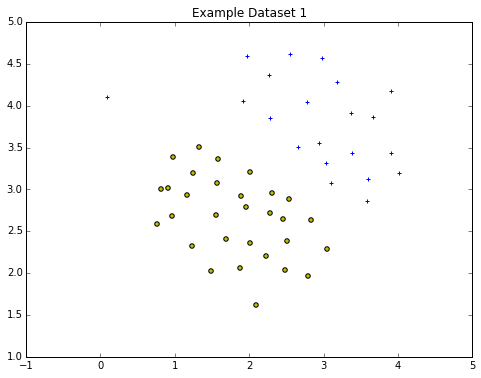

In [4]:
plt.figure(figsize=(8, 6))
plt.title('Example Dataset 1')
plt.scatter(data1['X'][:, 0][data1['y'][:, 0] == 1], data1['X'][:, 1][data1['y'][:, 0] == 1], c='b', marker='+')
plt.scatter(data1['X'][:, 0][data1['y'][:, 0] == 0], data1['X'][:, 1][data1['y'][:, 0] == 0], c='y', marker='o')
plt.show()

###$C=1$

In [5]:
from sklearn import svm

In [6]:
clf = svm.SVC(kernel='linear', C=1).fit(data1['X'], data1['y'].ravel())
clf.score(data1['X'], data1['y'].ravel())

0.98039215686274506

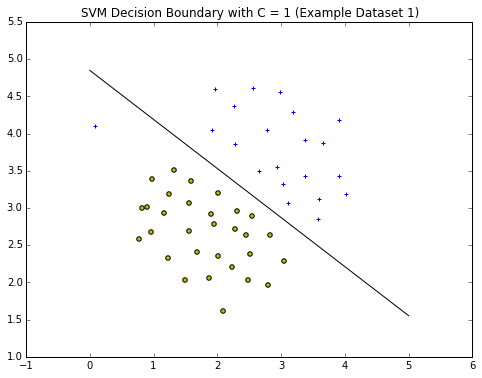

In [7]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - clf.intercept_[0] / w[1]

plt.figure(figsize=(8, 6))
plt.title('SVM Decision Boundary with C = 1 (Example Dataset 1)')
plt.scatter(data1['X'][:, 0][data1['y'][:, 0] == 1], data1['X'][:, 1][data1['y'][:, 0] == 1], c='b', marker='+')
plt.scatter(data1['X'][:, 0][data1['y'][:, 0] == 0], data1['X'][:, 1][data1['y'][:, 0] == 0], c='y', marker='o')
plt.plot(xx, yy, 'k-')
plt.show()

###$C=100$

In [8]:
clf2 = svm.SVC(kernel='linear', C=100).fit(data1['X'], data1['y'].ravel())
clf2.score(data1['X'], data1['y'].ravel())

1.0

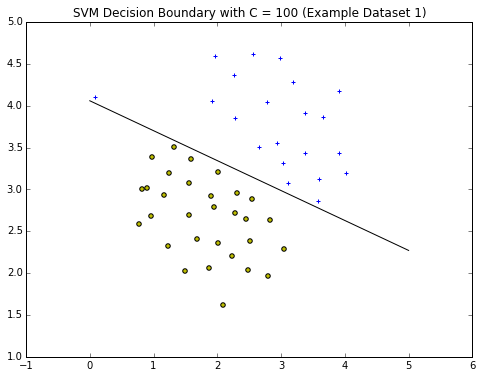

In [9]:
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - clf2.intercept_[0] / w[1]

plt.figure(figsize=(8, 6))
plt.title('SVM Decision Boundary with C = 100 (Example Dataset 1)')
plt.scatter(data1['X'][:, 0][data1['y'][:, 0] == 1], data1['X'][:, 1][data1['y'][:, 0] == 1], c='b', marker='+')
plt.scatter(data1['X'][:, 0][data1['y'][:, 0] == 0], data1['X'][:, 1][data1['y'][:, 0] == 0], c='y', marker='o')
plt.plot(xx, yy, 'k-')
plt.show()

##SVM with Gaussian Kernels

In [10]:
data2 = scipy.io.loadmat('ex6data2.mat')

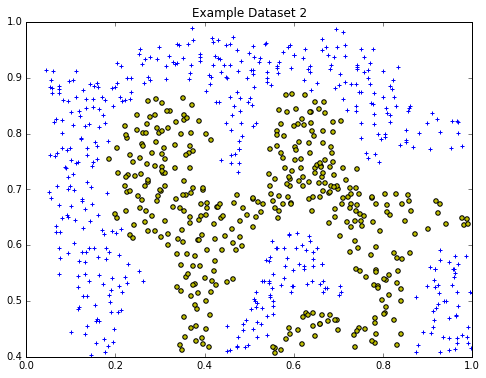

In [11]:
plt.figure(figsize=(8, 6))
plt.title('Example Dataset 2')
plt.scatter(data2['X'][:, 0][data2['y'][:, 0] == 1], data2['X'][:, 1][data2['y'][:, 0] == 1], c='b', marker='+')
plt.scatter(data2['X'][:, 0][data2['y'][:, 0] == 0], data2['X'][:, 1][data2['y'][:, 0] == 0], c='y', marker='o')
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.show()

In [12]:
clf3 = svm.SVC(kernel='rbf', C=1, gamma=50).fit(data2['X'], data2['y'].ravel())
clf3.score(data2['X'], data2['y'].ravel())

0.98957126303592124

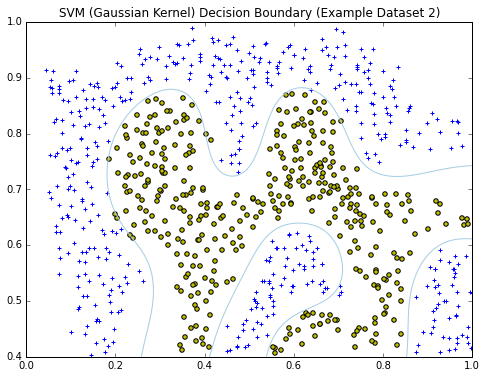

In [13]:
plt.figure(figsize=(8, 6))
plt.title('SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)')
plt.scatter(data2['X'][:, 0][data2['y'][:, 0] == 1], data2['X'][:, 1][data2['y'][:, 0] == 1], c='b', marker='+')
plt.scatter(data2['X'][:, 0][data2['y'][:, 0] == 0], data2['X'][:, 1][data2['y'][:, 0] == 0], c='y', marker='o')

xx, yy = np.meshgrid(np.linspace(0, 1, 500), np.linspace(0.4, 1, 500))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf3.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired, levels=[0])

plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.show()

##Example Dataset 3

In [14]:
data3 = scipy.io.loadmat('ex6data3.mat')

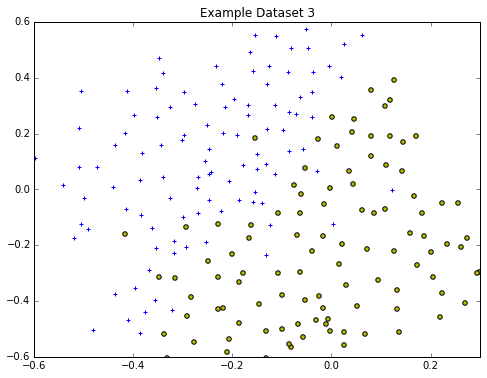

In [15]:
plt.figure(figsize=(8, 6))
plt.title('Example Dataset 3')
plt.scatter(data3['X'][:, 0][data3['y'][:, 0] == 1], data3['X'][:, 1][data3['y'][:, 0] == 1], c='b', marker='+')
plt.scatter(data3['X'][:, 0][data3['y'][:, 0] == 0], data3['X'][:, 1][data3['y'][:, 0] == 0], c='y', marker='o')
plt.xlim([-0.6, 0.3])
plt.ylim([-0.6, 0.6])
plt.show()

In [16]:
from sklearn.grid_search import GridSearchCV

In [17]:
C_range = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
delta_range = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
gamma_range = 1 / (2 *(delta_range ** 2))
params = dict(gamma=gamma_range, C=C_range)

clf4 = GridSearchCV(svm.SVC(), params, cv=3)
clf4.fit(data3['X'], data3['y'].ravel())

print 'best training score : %s' % clf4.best_score_
print clf4.best_estimator_

best training score : 0.881516587678
SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=49.999999999999993, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)


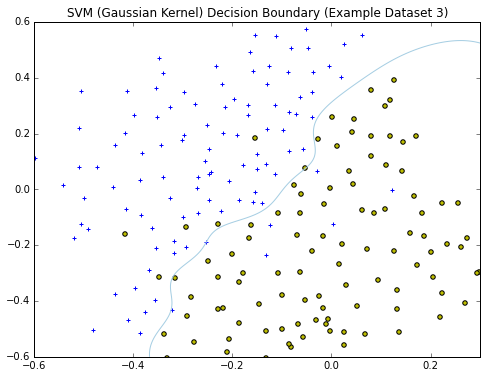

In [18]:
plt.figure(figsize=(8, 6))
plt.title('SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)')
plt.scatter(data3['X'][:, 0][data3['y'][:, 0] == 1], data3['X'][:, 1][data3['y'][:, 0] == 1], c='b', marker='+')
plt.scatter(data3['X'][:, 0][data3['y'][:, 0] == 0], data3['X'][:, 1][data3['y'][:, 0] == 0], c='y', marker='o')

xx, yy = np.meshgrid(np.linspace(-0.6, 0.3, 500), np.linspace(-0.6, 0.6, 500))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf4.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired, levels=[0])

plt.xlim([-0.6, 0.3])
plt.ylim([-0.6, 0.6])
plt.show()